In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from preprocessing import pregame
from scipy import stats

In [3]:
df = pd.read_csv("global_power_plant_database.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
pre = pregame(df)

In [5]:
pre.checks()

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         6477 non-null   object 
 1   country_long                    6477 non-null   object 
 2   name                            6477 non-null   object 
 3   gppd_idnr                       6477 non-null   object 
 4   capacity_mw                     6477 non-null   float64
 5   latitude                        6477 non-null   float64
 6   longitude                       6477 non-null   float64
 7   primary_fuel                    6477 non-null   object 
 8   other_fuel1                     59 non-null     object 
 9   other_fuel2                     4 non-null      object 
 10  other_fuel3                     0 non-null      float64
 11  commissioning_year              2662 non-null   float64
 12  owner                      

In [6]:
df["other_fuel1"].value_counts()

other_fuel1
Oil        25
Other      14
Gas         7
Coal        5
Petcoke     4
Hydro       3
Solar       1
Name: count, dtype: int64

In [7]:
pre.foreplay("other_fuel1","Oil")

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,Oil,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,Oil,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,Oil,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,Oil,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,Oil,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,CHN,China,Huadian Daan Fengshuishan Phase 1,WRI1071534,49.0,45.2667,123.4167,Wind,Oil,NaN,...,NaN,NaN,NaN,NaN,90.92,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
6473,CHN,China,Huadian Daan Fengshuishan Phase 2,WRI1072153,49.0,45.2956,123.4108,Wind,Oil,NaN,...,NaN,NaN,NaN,NaN,90.92,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
6474,CHN,China,Huadian Fengjie power station,WRI1072554,1200.0,31.1188,109.4473,Coal,Oil,NaN,...,NaN,NaN,NaN,NaN,5847.22,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
6475,CHN,China,Huadian Fulaerji-2 power station,WRI1070243,1200.0,47.1656,123.5848,Coal,Oil,NaN,...,NaN,NaN,NaN,NaN,5847.22,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [8]:
df.estimated_generation_note_2017.value_counts()

estimated_generation_note_2017
CAPACITY-FACTOR-V1    2679
HYDRO-V1              1922
SOLAR-V1-NO-AGE        848
NO-ESTIMATION          622
WIND-V1                402
SOLAR-V1                 3
Name: count, dtype: int64

In [9]:
columns = list(df.columns)
for col in columns:
  if df[col].isnull().sum() >= 12000:
    pre.micdrop('columns', {col})
  elif df[col].dtype == 'object':
    pre.foreplay(col, "unknown")
  else:
    pre.foreplay(col, "mean")


In [10]:
df.isnull().sum()

country                              0
country_long                         0
name                                 0
gppd_idnr                            0
capacity_mw                          0
latitude                             0
longitude                            0
primary_fuel                         0
other_fuel1                          0
other_fuel2                          0
other_fuel3                       6477
commissioning_year                   0
owner                                0
source                               0
url                                  0
geolocation_source                   0
wepp_id                              0
year_of_capacity_data                0
generation_gwh_2013                  0
generation_gwh_2014                  0
generation_gwh_2015                  0
generation_gwh_2016                  0
generation_gwh_2017                  0
generation_gwh_2018                  0
generation_gwh_2019               6477
generation_data_source   

In [11]:
df.shape

(6477, 36)

In [12]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,Oil,unknown,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,Oil,unknown,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,Oil,unknown,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,Oil,unknown,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,Oil,unknown,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [13]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,6477.000000,6477.000000,6477.000000,0.0,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,0.0,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000
mean,157.855112,7.427287,-2.156755,NaN,2002.158603,2016.443865,877.331896,818.774876,992.548079,945.921698,998.736960,767.414528,NaN,375.621700,412.987123,396.370101,392.693821,736.411630
std,491.561257,32.668880,83.278349,NaN,11.115177,1.659653,441.003923,423.517798,530.919788,578.700605,574.454480,467.274687,NaN,1119.428537,1323.843684,1290.141007,1330.463813,2334.685546
min,1.000000,-77.847000,-137.050900,NaN,1900.000000,2000.000000,0.003333,0.005000,0.000000,0.001667,0.021944,0.005000,NaN,1.310000,1.390000,1.260000,1.140000,0.000000
25%,5.500000,-22.788000,-62.822500,NaN,2002.158603,2016.443865,877.331896,818.774876,992.548079,945.921698,998.736960,767.414528,NaN,62.040000,68.160000,63.710000,62.660000,17.210000
50%,22.200000,-4.894900,-45.428000,NaN,2002.158603,2016.443865,877.331896,818.774876,992.548079,945.921698,998.736960,767.414528,NaN,375.621700,412.987123,396.370101,392.693821,87.260000
75%,72.800000,41.987800,102.252000,NaN,2006.000000,2017.000000,877.331896,818.774876,992.548079,945.921698,998.736960,767.414528,NaN,375.621700,412.987123,396.370101,392.693821,565.770000
max,13050.000000,64.491200,166.727100,NaN,2018.000000,2017.000000,16593.380000,16099.330278,17090.680000,22325.129000,20680.324000,17186.143889,NaN,48675.060000,58470.770000,57113.350000,60859.730000,58470.770000


In [14]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [15]:
fuel_by_county = df.groupby(["country", "primary_fuel"])["primary_fuel"].value_counts().reset_index(name="fuel type")
fuel_by_county

,country,primary_fuel,fuel type
0,AFG,Gas,1
1,AFG,Hydro,6
2,AFG,Solar,2
3,AGO,Gas,3
4,AGO,Hydro,5
...,...,...,...
120,KHM,Coal,2
121,KHM,Hydro,5
122,KHM,Oil,3
123,KHM,Solar,3


<Axes: xlabel='fuel type', ylabel='Count'>

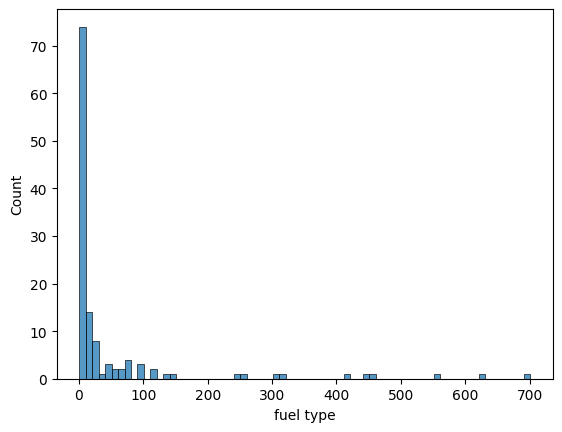

In [16]:
import seaborn as sns

sns.histplot(data = fuel_by_county, x = "fuel type")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'AFG'),
  Text(1, 0, 'AGO'),
  Text(2, 0, 'ALB'),
  Text(3, 0, 'ARG'),
  Text(4, 0, 'ARM'),
  Text(5, 0, 'ATA'),
  Text(6, 0, 'AUS'),
  Text(7, 0, 'AUT'),
  Text(8, 0, 'AZE'),
  Text(9, 0, 'BDI'),
  Text(10, 0, 'BEL'),
  Text(11, 0, 'BEN'),
  Text(12, 0, 'BFA'),
  Text(13, 0, 'BGD'),
  Text(14, 0, 'BGR'),
  Text(15, 0, 'BHR'),
  Text(16, 0, 'BIH'),
  Text(17, 0, 'BLR'),
  Text(18, 0, 'BOL'),
  Text(19, 0, 'BRA'),
  Text(20, 0, 'BRN'),
  Text(21, 0, 'BTN'),
  Text(22, 0, 'BWA'),
  Text(23, 0, 'CAF'),
  Text(24, 0, 'CAN'),
  Text(25, 0, 'CHL')])

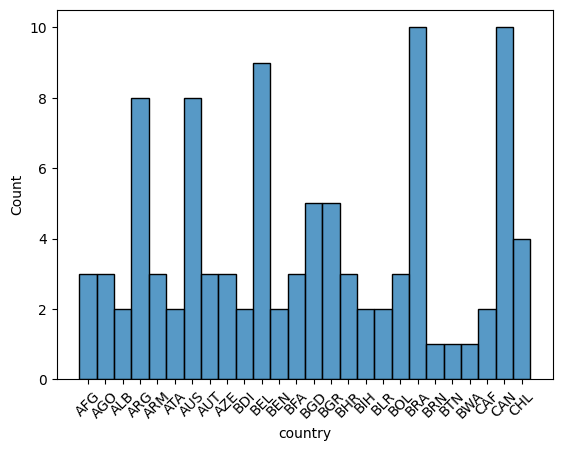

In [17]:
sns.histplot(data = fuel_by_county[:100], x = "country")
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Gas'),
  Text(1, 0, 'Hydro'),
  Text(2, 0, 'Solar'),
  Text(3, 0, 'Oil'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Coal'),
  Text(6, 0, 'Nuclear'),
  Text(7, 0, 'Wind'),
  Text(8, 0, 'Biomass'),
  Text(9, 0, 'Waste'),
  Text(10, 0, 'Wave and Tidal'),
  Text(11, 0, 'Petcoke')])

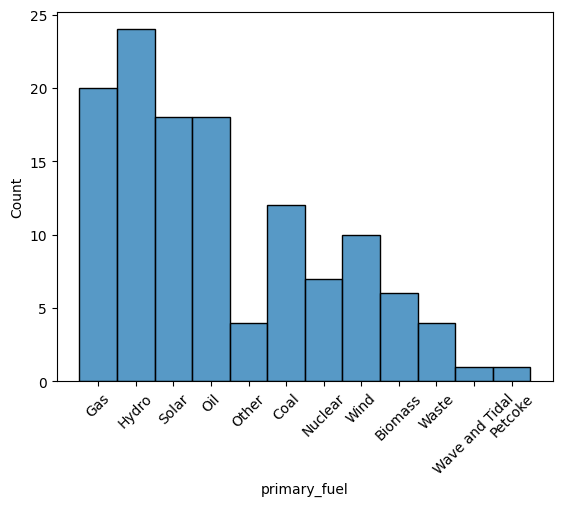

In [18]:
sns.histplot(data = fuel_by_county, x = "primary_fuel")
plt.xticks(rotation = 45)

In [19]:
#Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
year = 3
for year in range(5):
  print(f"YEAR 201{str(year+3)}")
  df_year= df.groupby("primary_fuel")[f"estimated_generation_gwh_201{str(year+3)}"].describe()
  print(df_year)
  year+=1

YEAR 2013
                 count        mean           std       min       25%  \
primary_fuel                                                           
Biomass          605.0  375.621700  0.000000e+00  375.6217  375.6217   
Coal             422.0  375.621700  0.000000e+00  375.6217  375.6217   
Gas              585.0  375.621700  5.689207e-14  375.6217  375.6217   
Hydro           1931.0  516.914494  2.033484e+03    1.5900   15.5700   
Nuclear           23.0  375.621700  0.000000e+00  375.6217  375.6217   
Oil              907.0  375.621700  5.687478e-14  375.6217  375.6217   
Other              6.0  375.621700  0.000000e+00  375.6217  375.6217   
Petcoke            1.0  375.621700           NaN  375.6217  375.6217   
Solar            851.0   82.349130  1.342927e+02    1.3100   15.7100   
Waste             72.0  375.621700  0.000000e+00  375.6217  375.6217   
Wave and Tidal     1.0  375.621700           NaN  375.6217  375.6217   
Wind            1073.0  353.942830  8.062381e+01    2.

3.

H0: There is a significant difference in the mean power output by fuel type.

H1: There is no significant difference in th emean power output by fiel type.

In [20]:
# Assuming df is your DataFrame containing the data
generation_list = ["estimated_generation_gwh_2013", "estimated_generation_gwh_2014",
                   "estimated_generation_gwh_2015", "estimated_generation_gwh_2016",
                   "estimated_generation_gwh_2017"]

# Initialize an empty DataFrame to store the results
results = []

# Iterate over each year
for fuel_gen in generation_list:
    # Calculate the mean generation for each fuel type in the current year
    year_mean = df.groupby('primary_fuel')[fuel_gen].mean().reset_index()
    # Rename the columns for clarity
    year_mean.columns = ['primary_fuel', 'mean_generation_gwh']
    # Add a column for the year
    year_mean['year'] = int(fuel_gen.split('_')[-1])
    # Append the results for the current year to the overall results list
    results.append(year_mean)

# Concatenate the results for all years into a single DataFrame
result_df = pd.concat(results, ignore_index=True)

# Reorder the columns if needed
result_df = result_df[['year', 'primary_fuel', 'mean_generation_gwh']]

# Display the first few rows of the resulting DataFrame
print(result_df.head())


   year primary_fuel  mean_generation_gwh
0  2013      Biomass           375.621700
1  2013         Coal           375.621700
2  2013          Gas           375.621700
3  2013        Hydro           516.914494
4  2013      Nuclear           375.621700


In [21]:
# Assuming result_df is a DataFrame containing power output data by fuel type
# You'll need to specify the columns containing power output data for each fuel type

# For example, if result_df has columns 'fuel_type' and 'power_output':
fuel_types = result_df['primary_fuel'].unique()
grouped_data = [result_df[result_df['primary_fuel'] == fuel_type]['mean_generation_gwh'] for fuel_type in fuel_types]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Decide whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is no significant difference in the mean power output by fuel type.")
else:
    print("Fail to reject the null hypothesis: There is a significant difference in the mean power output by fuel type.")


F-statistic: 0.972264054415319
p-value: 0.4837319140860612
Fail to reject the null hypothesis: There is a significant difference in the mean power output by fuel type.


<Axes: xlabel='year', ylabel='mean_generation_gwh'>

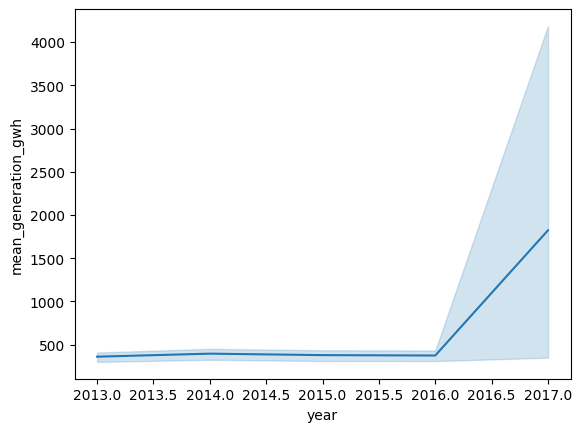

In [22]:
sns.lineplot(x = "year", y="mean_generation_gwh",data = result_df)

In [23]:
df_years = result_df.groupby(["year", "primary_fuel"])["mean_generation_gwh"].mean()